In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Dataset

In [2]:
from sklearn.datasets import load_diabetes
raw_df = load_diabetes()

In [3]:
type(raw_df)

sklearn.utils.Bunch

In [4]:
raw_df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
raw_df.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [6]:
raw_df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
raw_df.target_filename

'diabetes_target.csv.gz'

In [8]:
raw_df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [9]:
raw_df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Preparing Dataset

In [10]:
df = pd.DataFrame(raw_df.data, columns=raw_df.feature_names)

In [11]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [12]:
df['diabetes_progression'] = raw_df.target

In [13]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Check the missing values

In [14]:
df.isnull().sum()

age                     0
sex                     0
bmi                     0
bp                      0
s1                      0
s2                      0
s3                      0
s4                      0
s5                      0
s6                      0
diabetes_progression    0
dtype: int64

In [15]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [16]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


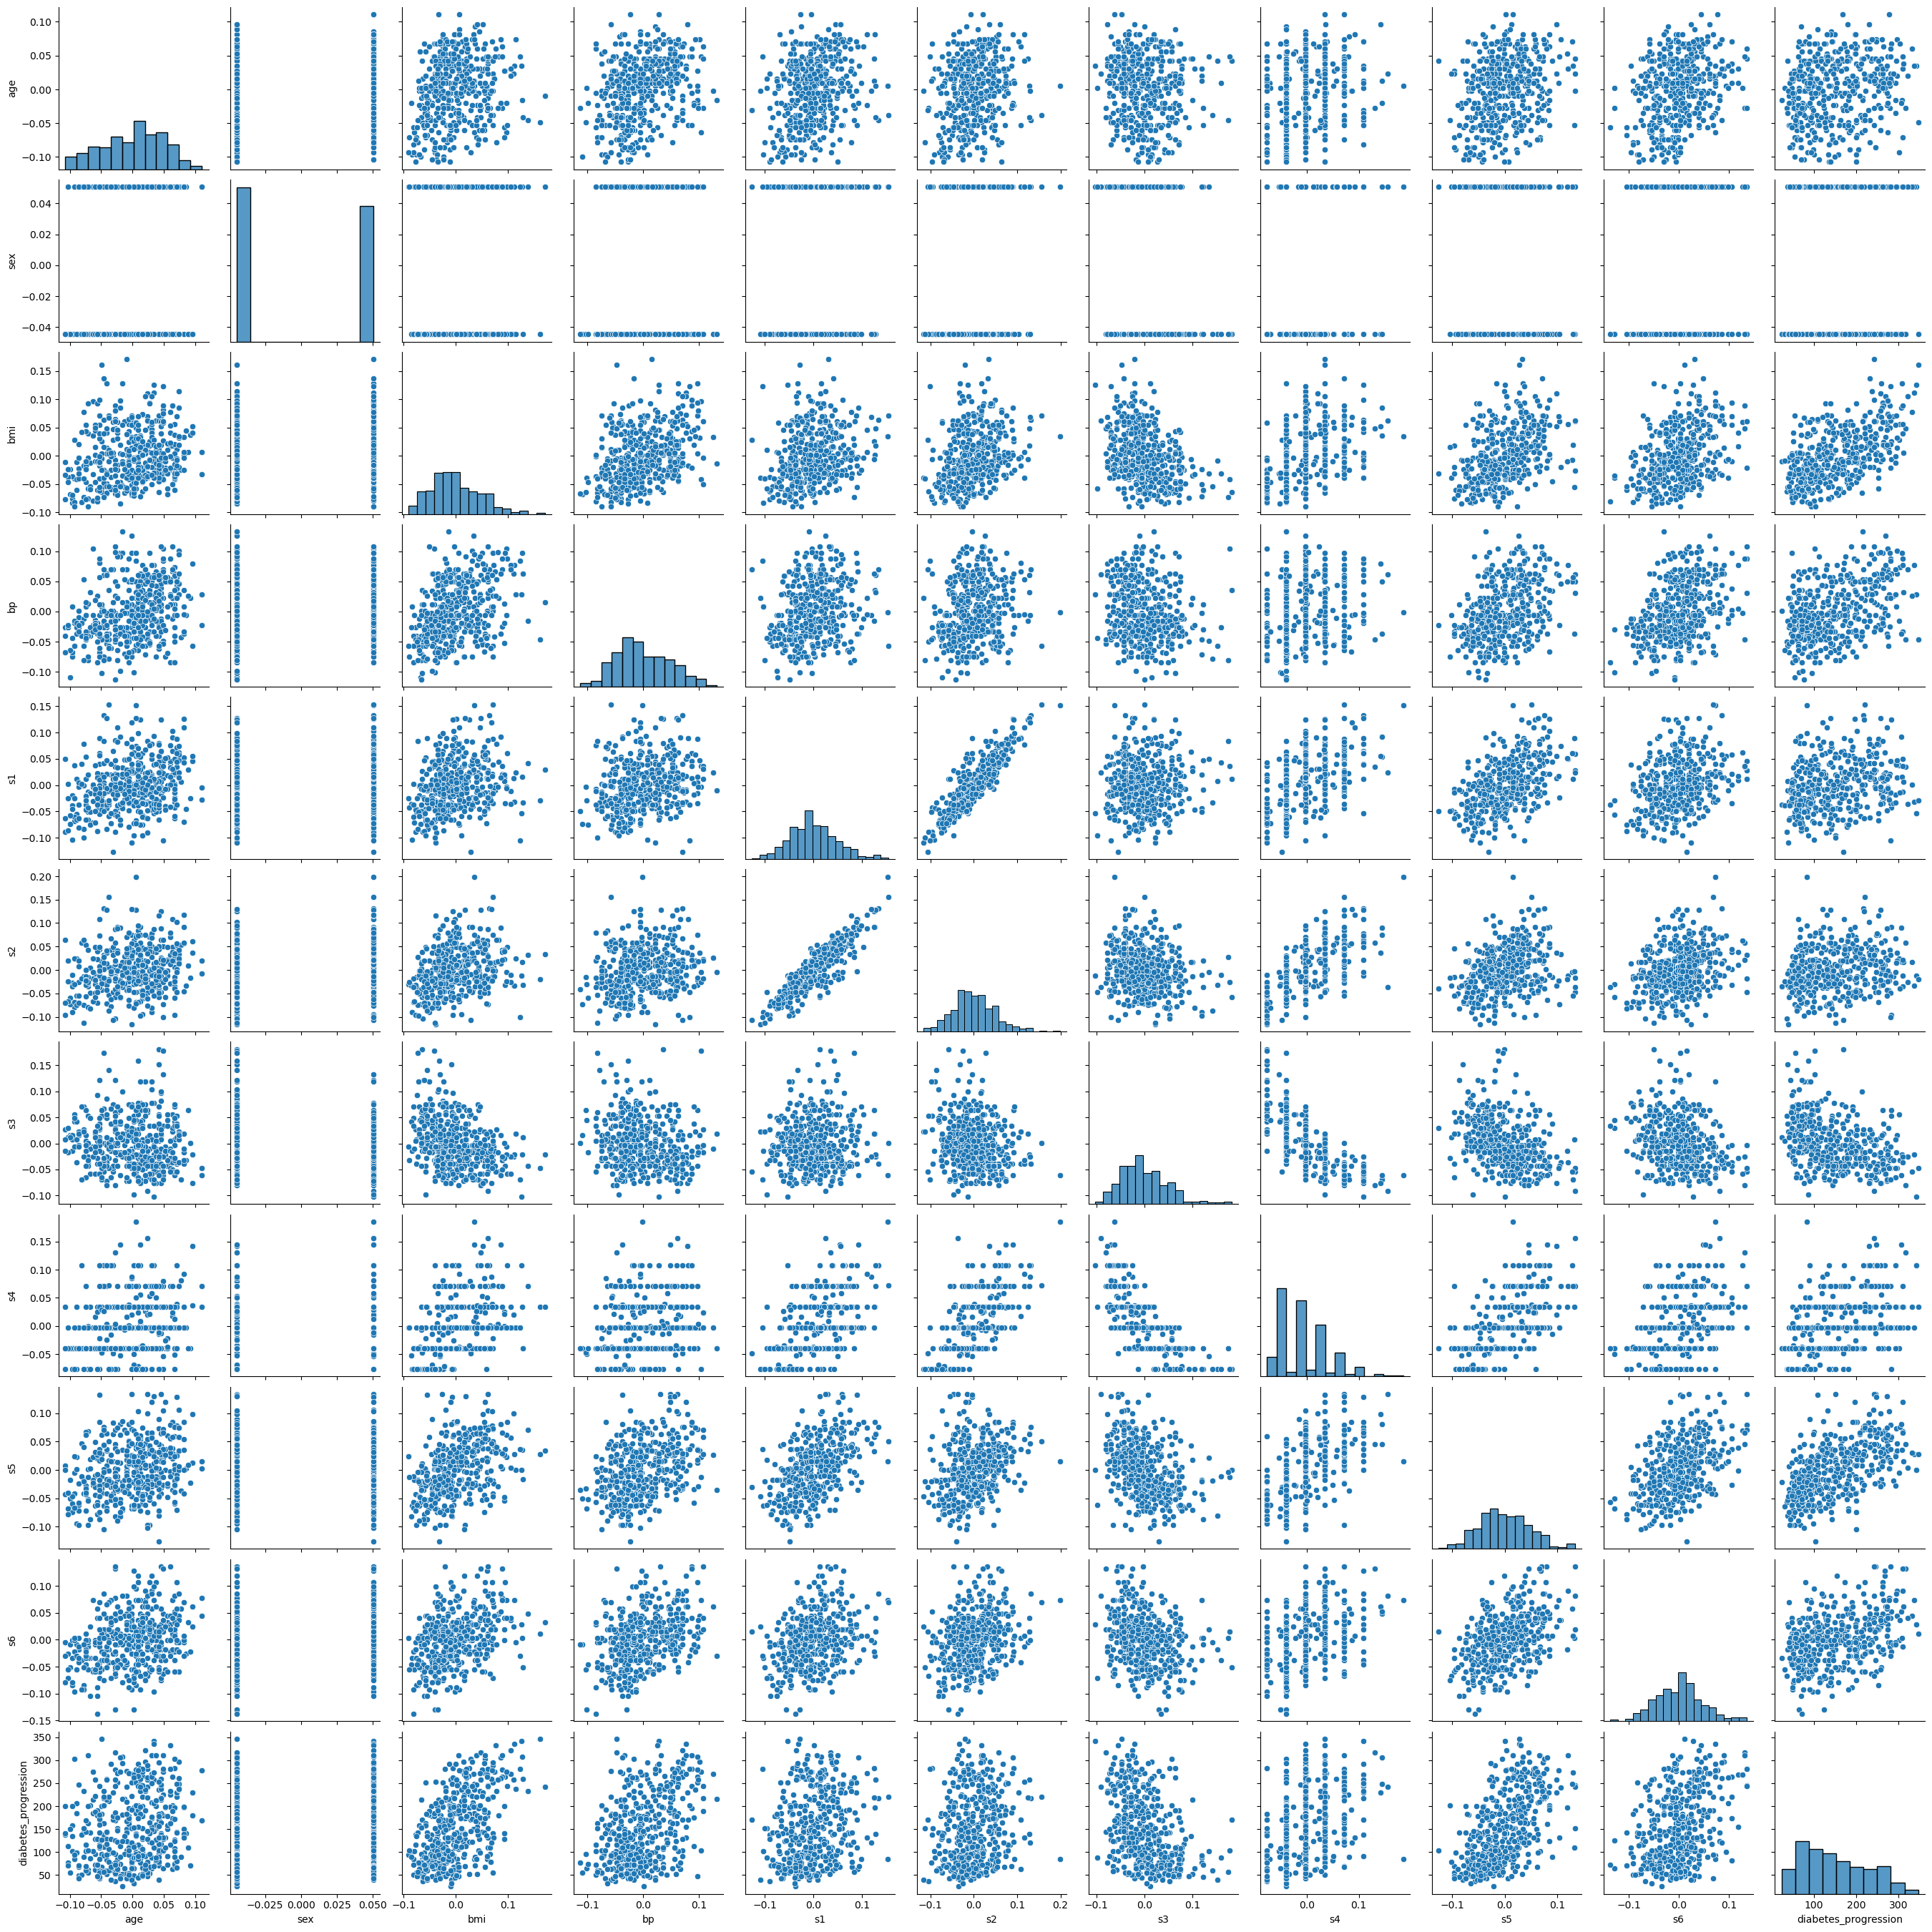

In [17]:
sns.pairplot(df)

Independent and Dependent feature

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [20]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetes_progression, Length: 442, dtype: float64

##Split train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
# X_test.shape
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
212,0.067136,-0.044642,0.003494,0.035644,0.049341,0.031254,0.070730,-0.039493,-0.000609,0.019633
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362
67,0.041708,0.050680,-0.014828,-0.017147,-0.005697,0.008394,-0.013948,-0.001854,-0.011901,0.003064
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024791,0.019633
390,0.009016,0.050680,0.069241,0.059744,0.017694,-0.023234,-0.047082,0.034309,0.103292,0.073480
...,...,...,...,...,...,...,...,...,...,...
129,0.009016,-0.044642,0.016428,0.004658,0.009439,0.010586,-0.028674,0.034309,0.038968,0.119043
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064
332,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057104,0.036201
150,0.023546,-0.044642,0.070319,0.025315,-0.034592,-0.014466,-0.032356,-0.002592,-0.019197,-0.009362


In [23]:
X_train.shape

(353, 10)

In [24]:
y_test.shape

(89,)

In [25]:
y_train.shape

(353,)

###Standardize the dataset

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [53]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [28]:
x_test

array([[ 1.39424785e+00, -9.10502907e-01,  1.17077508e-01,
         7.55913953e-01,  1.06047137e+00,  7.03754617e-01,
         1.44309723e+00, -8.02763086e-01, -6.59337746e-03,
         4.38779344e-01],
       [-1.61872730e+00,  1.09829413e+00,  1.68823831e+00,
         1.11748255e+00,  1.66963637e+00,  1.40650445e+00,
         5.11314612e-01,  2.23483843e-03,  8.56628343e-01,
        -1.79011972e-01],
       [ 8.66977198e-01,  1.09829413e+00, -2.70020081e-01,
        -3.52896414e-01, -9.98429071e-02,  2.19785394e-01,
        -3.42819455e-01,  1.83347969e-02, -2.42704079e-01,
         8.57557351e-02],
       [-9.40807892e-01, -9.10502907e-01, -9.75903921e-01,
        -4.01105561e-01,  1.61885207e-02, -2.97332405e-01,
         1.36544868e+00, -8.02763086e-01, -5.12252352e-01,
         4.38779344e-01],
       [ 1.89057789e-01,  1.09829413e+00,  1.50607474e+00,
         1.26210999e+00,  3.93290661e-01, -4.49815859e-01,
        -1.04165642e+00,  8.07232763e-01,  2.16605077e+00,
         1.

#Model Training

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [30]:
regression.coef_

array([ -0.44178614,  -9.7496277 ,  24.45665384,  16.21733602,
       -42.47903556,  26.50844836,   7.29631183,   5.80950356,
        41.18107507,   2.46021544])

In [31]:
regression.intercept_

150.45892351274787

In [32]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [33]:
regression.score(x_test, y_test)

0.4399387660024645

###Prediction

In [34]:
reg_pre = regression.predict(x_test)

In [35]:
reg_pre

array([154.1235067 , 204.81721599, 124.92988001, 106.09339576,
       258.53035681, 256.32953702, 118.75258786, 119.52147402,
       101.50717468, 190.54137158, 141.70360267, 172.51631204,
       174.34089304, 134.81184017, 294.13950798,  94.11403289,
       211.97052873, 156.49984762, 134.20709632, 119.62534726,
       148.88045343, 165.00378118, 151.09977307, 176.03719872,
       133.27651748, 221.29531227, 197.17482787,  96.15923158,
        50.26531577, 230.48342249, 242.06266394, 114.1153262 ,
        67.0785352 ,  94.53179042, 201.21593262, 167.05306138,
       159.87838519, 192.78601513, 114.49291816, 233.4825497 ,
       140.82309666, 121.06814332, 192.27431013, 191.13157307,
       179.1698153 , 148.35140027, 163.47610288, 276.81203359,
       100.17813072, 164.11265163, 255.81074398, 136.94979051,
       152.37507828, 107.92662528, 194.21661635,  77.35015426,
       118.50951725,  68.38527563, 154.29094022, 162.48905632,
       168.36590928, 156.8764705 ,  97.13958436, 238.17

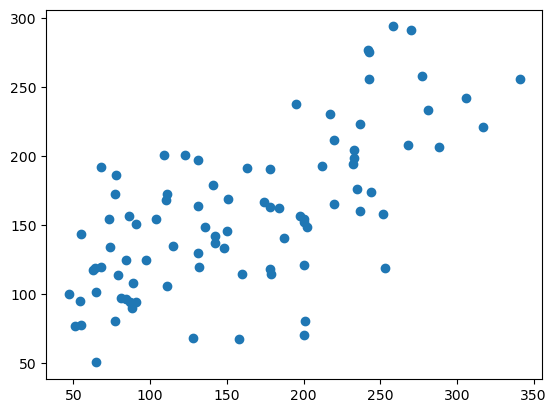

In [36]:
plt.scatter(y_test, reg_pre)

In [37]:
residual = y_test - reg_pre

In [38]:
residual

212   -81.123507
422    28.182784
67    -27.929880
89      4.906604
390    18.469643
         ...    
129    59.731834
417   -88.796291
332   -21.284381
150    81.673987
192    -3.228010
Name: diabetes_progression, Length: 89, dtype: float64

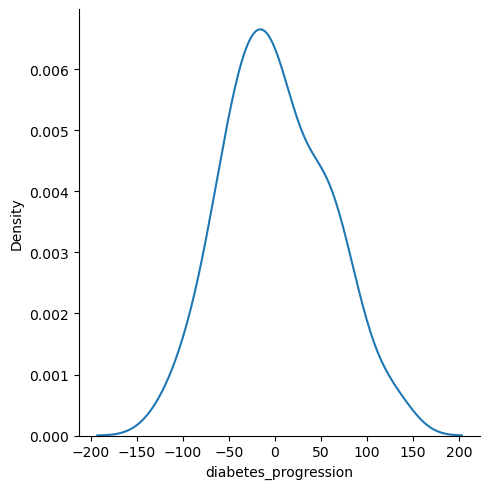

In [39]:
sns.displot(residual, kind="kde")

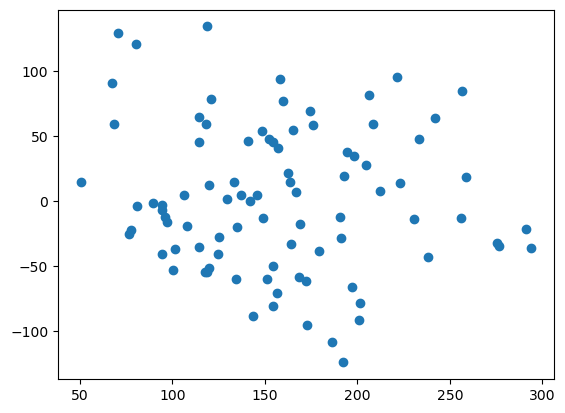

In [40]:
plt.scatter(reg_pre, residual)

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(y_test, reg_pre)

45.212924812996754

In [43]:
mean_squared_error(y_test, reg_pre)

3094.4295991207023

In [44]:
np.sqrt(mean_squared_error(y_test, reg_pre))

55.62759745954073

##R^2 and adjusted R^2

In [45]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pre)
print(score)

0.4399387660024645


In [46]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3681360436950881

#New Data Prediction

In [47]:
raw_df.data[0].reshape(1,-1)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]])

In [48]:
regression.predict(scaler.transform(raw_df.data[0].reshape(1,-1)))

c:\Users\swaga\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([209.72294308])

#Picking the model for deploymenr

In [49]:
import pickle

In [50]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [51]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [52]:
pickled_model.predict(scaler.transform(raw_df.data[0].reshape(1,-1)))

c:\Users\swaga\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([209.72294308])